# Exploring data with Python - visualize data

### Loading our data

In [2]:
import pandas as pd
df = pd.read_csv("grades.csv")

In [3]:
# Remove any rows with missing data
df = df.dropna(axis=0, how= "any")

In [4]:
# Calculate who passed, assuming '60' is the grade needed to pass
passed  = pd.Series(df['Grade'] >= 60)
print(passed)

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11     True
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
20     True
21     True
Name: Grade, dtype: bool


In [5]:
# Save who passed to the Pandas dataframe
df = pd.concat([df, passed.rename("Pass")], axis=1)
df

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


In [6]:
# Find the maximum Grade
max_grade = df.Grade.max()
min_grade = df.Grade.min()
print(max_grade)
print(min_grade)

97.0
3.0


In [7]:
# Assign colors based on whether the grade is the maximum (green), minimum (red), or neither (blue)
colors = ["Green" if grade == max_grade else "red" if grade == min_grade else "Blue" for grade in df.Grade]

##### The Matplotlib library provides the foundation for plotting data visualizations that can greatly enhance your ability to analyze the data.
##### Let's start with a simple bar chart that shows the grade of each student.

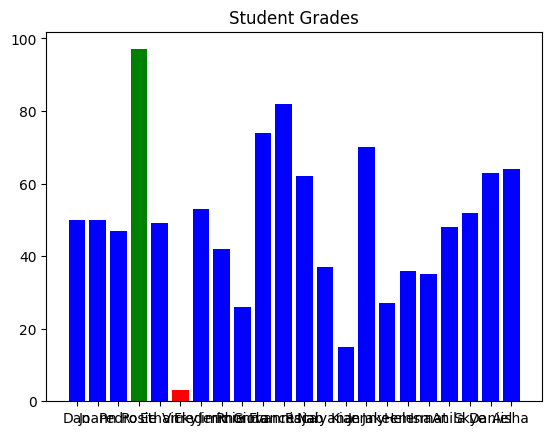

In [8]:
# Ensure plots are displayed inline in the notebook. Displayed inline means to display all the plots generated by matplotlib directly inside the notebook, rather than opening them in a separate window. This is especially useful for visualizing plots immediately after you run the code.

%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df.Name, height=df.Grade, color= colors)
plt.title("Student Grades")

# Display the plot
plt.show()

##### Well, that worked, but the chart could use some improvements to make it clearer what we're looking at.

  ##### Note that you used the pyplot class from Matplotlib to plot the chart. This class provides many ways to improve the visual elements of the plot. For example, the following code:

###### * Specifies the color of the bar chart.
###### * Adds a title to the chart (so we know what it represents)
###### * Adds labels to the X and Y axes (so we know which axis shows which data)
###### * Adds a grid (to make it easier to determine the values for the bars)
###### * Rotates the X markers (so we can read them)

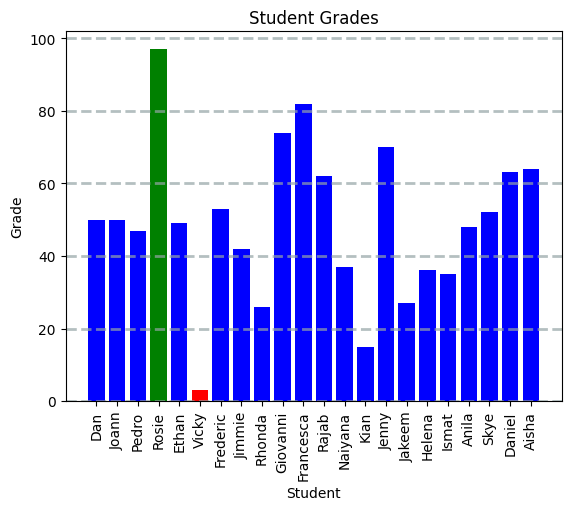

In [9]:
# Create a bar plot of name vs grade
plt.bar(x=df.Name, height=df.Grade, color= colors)

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
#color='#95a5a6': Sets the color of the grid lines using a hex color code (in this case, a shade of grey).
#linestyle='--': Defines the style of the grid lines. The -- specifies dashed lines. Solid Line ('-') A continuous solid line.  Dotted Line (':') A line made up of small dots. Dash-Dot Line ('-.') A line that alternates between dashes and dots.
#linewidth=2: Sets the thickness (width) of the grid lines to 2 units. A higher value means thicker lines.
#axis='y': Specifies that the grid lines should only be displayed along the y-axis (horizontal lines).
#alpha=0.7: Controls the transparency of the grid lines. The value ranges from 0 (completely transparent) to 1 (completely opaque). A value of 0.7 makes the grid lines slightly transparent.

plt.xticks(rotation=90)
#rotation=90: Rotates the x-axis labels by 90 degrees, making them vertical. This is helpful when the labels are long and would otherwise overlap or clutter the plot if kept horizontal.

# Display the plot
plt.show()

##### A plot is technically contained within a Figure. In the previous examples, the figure was created implicitly for you, but you can create it explicitly. For example, the following code creates a figure with a specific size.

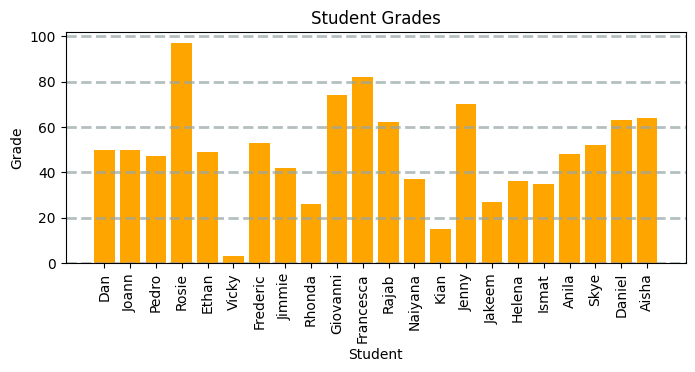

In [10]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=df.Name, height=df.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

##### A figure can contain multiple subplots, each on its own axis. Using plt.figure() creates a single figure, but you can then divide this figure into different sections to hold multiple charts. To do this, you would typically use the plt.subplot() or fig.add_subplot() functions.

##### For example, the following code creates a figure with two subplots: one is a bar chart showing student grades, and the other is a pie chart comparing the number of passing grades to non-passing grades.

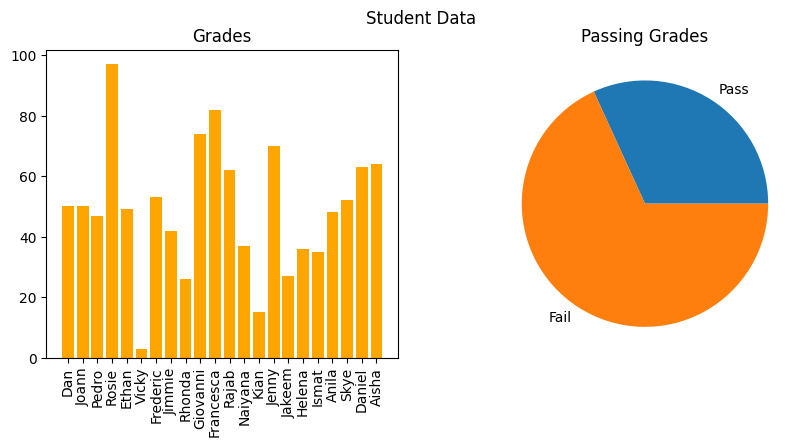

In [11]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df.Name, height=df.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticks(range(len(df['Name'])))
ax[0].set_xticklabels(df.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
# pass_counts = df['Pass'].value_counts()
# ax[1].pie(pass_counts, labels=pass_counts)
# ax[1].set_title('Passing Grades')
# ax[1].legend(pass_counts.keys().tolist())

# Count the occurrences of True and False in the Pass column
pass_counts = df['Pass'].value_counts()

# Access the counts of True and False separately if needed
pass_count = pass_counts[True] if True in pass_counts else 0
#you can omit the conditional check if you’re confident that both True and False values are present in the Pass column.
fail_count = pass_counts[False] if False in pass_counts else 0

# Define labels and sizes for the pie chart
labels = ['Pass', 'Fail']
sizes = [pass_count, fail_count]  # Corresponding counts for Pass and Fail

ax[1].pie(sizes, labels=labels)
ax[1].set_title('Passing Grades')
#ax[1].legend(labels)


# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
plt.show()

# OR
##### In the following example, The 2,2,i structure divides the figure into a 2*2 grid (2 rows and 2 columns), and i specifies the position of each chart.

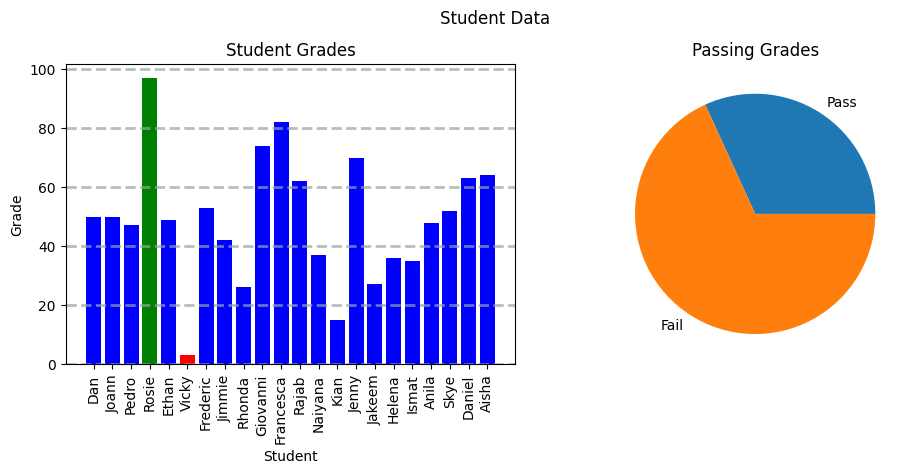

In [12]:
# Create a Figure
fig = plt.figure(figsize=(10,8))

#First chart in a 2*2 grid (top left)
ax1 = fig.add_subplot(2,2,1)
ax1.bar(x=df.Name, height=df.Grade, color=colors)

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)


#second chart in a 2*2 grid (top right)
ax2= fig.add_subplot(2,2,2)

# Count the occurrences of True and False in the Pass column
pass_counts = df['Pass'].value_counts()

# Access the counts of True and False separately if needed
pass_count = pass_counts[True] if True in pass_counts else 0
#you can omit the conditional check if you’re confident that both True and False values are present in the Pass column.
fail_count = pass_counts[False] if False in pass_counts else 0

# Define labels and sizes for the pie chart
labels = ['Pass', 'Fail']
sizes = [pass_count, fail_count]  # Corresponding counts for Pass and Fail

ax2.pie(sizes, labels=labels)
ax2.set_title('Passing Grades')
#plt.title('Passing Grade')
#ax2.legend(labels)


# Add a title to the Figure
fig.suptitle('Student Data')

#Adjust spacing to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()


##### Until now, you've used methods of the Matplotlib.pyplot object to plot charts. However, Matplotlib is so foundational to graphics in Python that many packages, including Pandas, provide methods that abstract the underlying Matplotlib functions and **simplify** plotting. For example, the DataFrame provides its own methods for plotting data as shown in the following example, which plots a bar chart of study hours.

<Axes: xlabel='Name'>

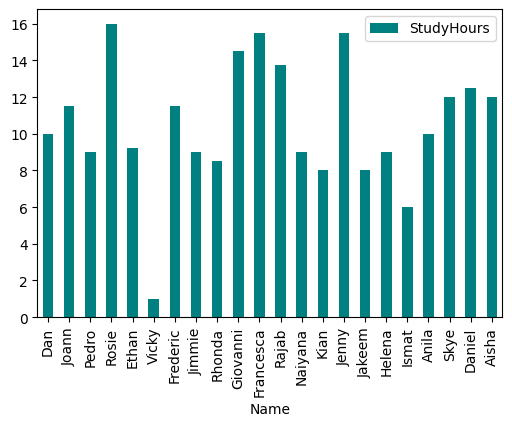

In [13]:
df.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

##### plot() used for line charts

<Axes: xlabel='StudyHours'>

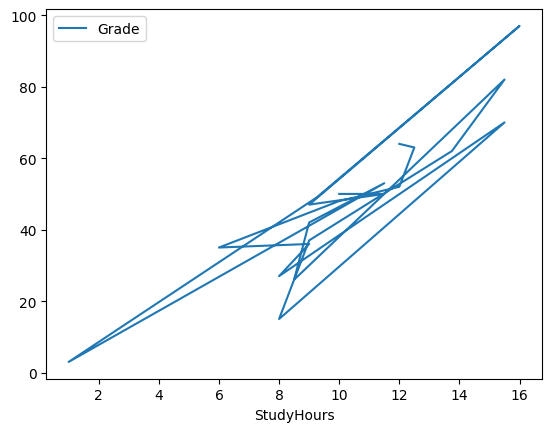

In [14]:
df.plot(x='StudyHours', y= 'Grade')

<Axes: xlabel='StudyHours', ylabel='Grade'>

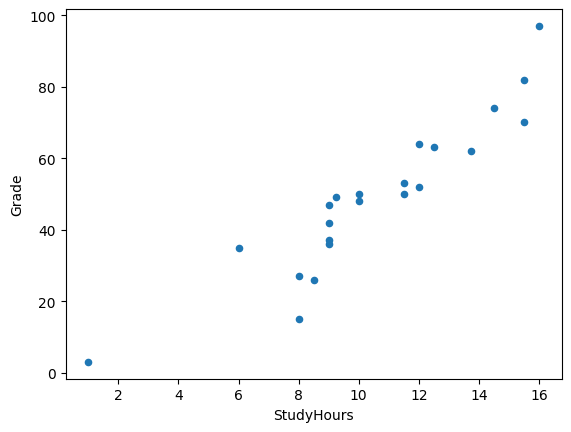

In [15]:
df.plot.scatter(x='StudyHours', y= 'Grade')